# Принятие решений в бизнесе на основе данных (А/В-тесты)

<p>Имеется крупный интернет-магазин. Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.</p>
<p>Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.</p>

## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

<b>Задача:</b>
1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Изучим таблицу с гипотезами по увеличению выручки интернет-магазина с параметрами Reach, Impact, Confidence, Effort: выведем первые 10 строк таблицы и посмотрим информацию о таблице.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('display.max_colwidth', -1)
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [2]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Всего в таблице представлено 9 гипотез, по каждой гипотезы заполнены столбцы, необходимые для их приоритезации. Однако в таблице не виден полностью текст гипотез. Выведем отдельно уникальные значения столбца, содержащего названия гипотез, и изучим их.

In [3]:
hypothesis['Hypothesis'].value_counts()

Запустить акцию, дающую скидку на товар в день рождения                                                         1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пол

#### Приоритезация гипотез ICE

ICE = (Impact * Confidence) / Efforts 

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis['ICE'] = hypothesis['ICE'].round(2)
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


В топ-3 по методу ICE попали гипотезы с индексами 8, 0 и 7. 

#### Приоритезация гипотез RICE

RICE = (Reach * Impact * Confidence) / Efforts 

In [5]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


В топ-3 по методу RICE попали гипотезы с индексами 7, 2, и 0.

### Вывод

<p>В топ-3 по методу ICE попали гипотезы с индексами 8, 0 и 7.</p> 
<p>В топ-3 по методу RICE попали гипотезы с индексами 7, 2, и 0.</p>
<p>Как видим, гипотезы 7 и 0 вошли в топ-3 по двум фреймворкам. Однако вместо гипотезы 8 по методу ICE в топ-3 по RICE попала гипотеза 2. Это обусловлено тем, что наиболее перспективная гипотеза по ICE (8) затронет минимальное количество пользователей, чем другие гипотезы. А при приоритезации гипотез очень важно учитывать охват аудитории, которая попадает под влияние гипотезы.</p>

## Часть 2. Анализ A/B-теста

Провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

<b>Задача:</b> проанализировать A/B-тест</p>
<p><i>Чек-лист шагов анализа внизу документа</i></p>

In [6]:
import datetime as dt

In [7]:
#Прочитаем файл с данными о заказах и посмотрим на первые 5 строк таблицы
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

In [8]:
#Посмотрим информацию о данных
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
#Для удобства и более коротких названий столбцов переименуем столбец transactionId на orderId, а visitorId на userId 
#также изменим формат столбца, содержащего информацию о дате
orders = orders.rename(columns={'transactionId': 'orderId', 'visitorId': 'userId'})
#orders.columns =['orderId', 'userId', 'date', 'revenue', 'group']
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
orderId    1197 non-null int64
userId     1197 non-null int64
date       1197 non-null datetime64[ns]
revenue    1197 non-null int64
group      1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
#Прочитаем файл с данными о посещениях и выведем первые 5 строк таблицы
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [11]:
#Посмотрим информацию о данных
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
#Изменим формат столбца, содержащего информацию о дате
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
#Посмотрим, равномерно ли распределились пользователь по группам А/В-теста в таблице о посещениях 
visitors.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

<p>Мы прочитали данные из двух таблиц, преобразовали тип данных для столбцов, содержащих дату, посмотрели, какое количество пользователей попало в каждую группу. </p>
<p>Видим, что пользователи распределились практически равномерно - в группе В количество пользователей на 0,9% больше, чем в группе А.</p>

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами:
- date — дата;
- group — группа A/B-теста (A или B);
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.
<br><p>Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():

In [14]:
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах

In [15]:
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [16]:
#Получим агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'orderId' : pd.Series.nunique, 'userId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [17]:
#Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
                                       axis=1).sort_values(by=['date','group'])

In [18]:
#Объединим кумулятивные данные в одной таблице и присвоем ее столбцам названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [19]:
#Выведем первые 5 строк таблицы и посмотрим результат
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [20]:
#Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [21]:
#Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

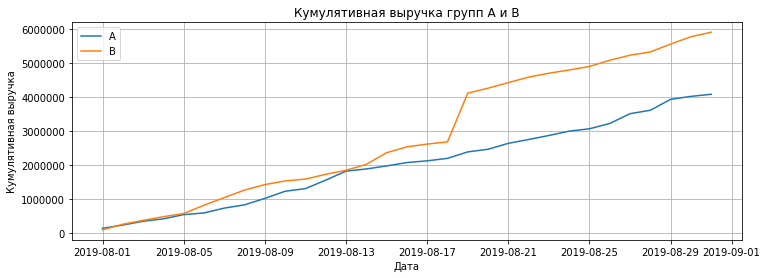

In [22]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
plt.figure(figsize=(12, 4))

#Построим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

#Построим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.grid(True)
plt.title('Кумулятивная выручка групп А и В')
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако графики выручки группы В немного опережает график выручки А, а затем очень сильно прирастает в одной точке и дальше продолжает свою динамику роста. Это может сигнализировать о всплеске числа заказав группы В в определенный день, либо о появлении очень дорогого заказа. Необходимо будет посмотреть на выбросы в стоимости заказов.

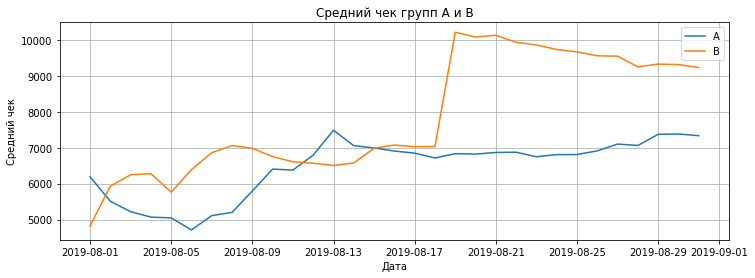

In [23]:
#Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(12, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')


plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid(True)
plt.title('Средний чек групп А и В')

plt.legend()
plt.show()

Средний чек тоже становится чуть более равномерным ближе к концу теста: чуть-чуть увеличивается для группы A и продолжает падать для группы B. Возможно, в группу B в середине теста попали очень дорогие заказы (резкий всплеск на графике). Тогда этой группе нужно больше времени и данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

Построим график относительного различия для среднего чека

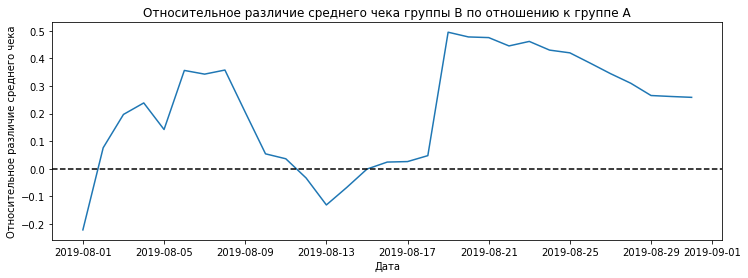

In [24]:
#Cоберём данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 4))

#Построим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

#Добавим ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xlabel('Дата')
plt.ylabel('Относительное различие среднего чека')
plt.title('Относительное различие среднего чека группы В по отношению к группе А')



plt.show()

Резкие скачки на графике сигнализируют о том, что в группе В могли быть очень дорогие заказы. Линия становится чуть более равномерной к концу теста.

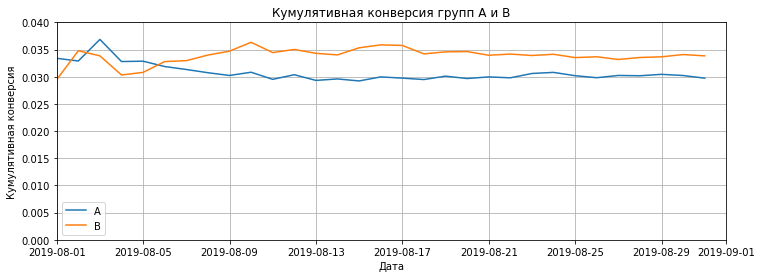

In [25]:
#Посчитаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#Отделим данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#Отделим данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12, 4))
#Построим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
#Зададим масштаб осей
plt.axis(["2019-08-01", '2019-09-01', 0, 0.040]) 
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.grid(True)
plt.title('Кумулятивная конверсия групп А и В')

plt.show()

В начале теста группы демонстрировали практически одинаковое поведение, однако затем группа В вырвалась вверх и зафиксировалась в этом значении до конца теста.

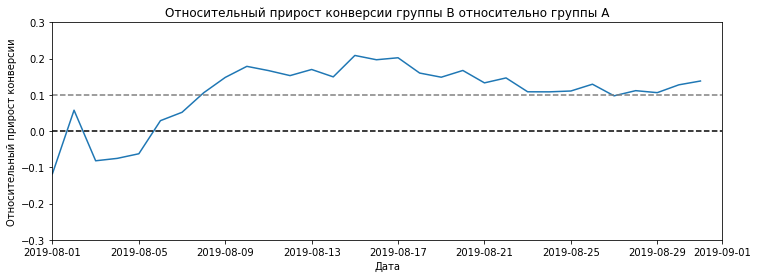

In [26]:
#Построим график относительного различия кумулятивных конверсий
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 4))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.3])

plt.xlabel('Дата')
plt.ylabel('Относительный прирост конверсии')
plt.title('Относительный прирост конверсии группы B относительно группы A')

plt.show()

В самом налаче группа В проигрывала группе А, однако потом она вырвалась вверх и не спускается ниже значения прироста в 10% относительно группы А. Также, как видно в конце графика, прирост конверсии продолжает увеличиваться. В целом, отношение конверсии ещё окончательно не установилось, однако уже видно, что группа В демонстрирует более высокую конверсию.

In [27]:
#Подсчитаем количество заказов по пользователям
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(5)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


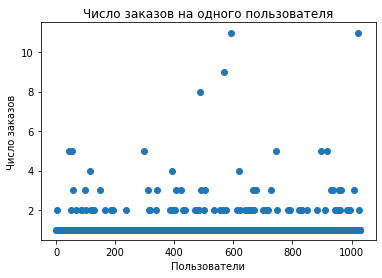

In [28]:
#Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel('Пользователи')
plt.ylabel('Число заказов')
plt.title('Число заказов на одного пользователя')
plt.show()

Как видим на графике, есть некоторые пользователи, которые совершили 4 и более заказов.

In [29]:
#Посчитаем выборочные перцентили количества заказов на одного пользователя
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И только 1% пользователей заказывали более четырёх раз.
Таким образом, в качестве нижней границы числа заказов на одного пользователя разумно выбрать 3 заказа - в данном случае мы отсеем от 1 до 5% аномальных пользователей. 

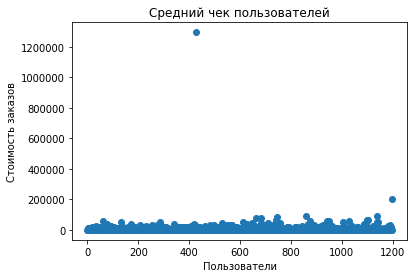

In [30]:
#Построим точечный график стоимости заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title('Средний чек пользователей')
plt.show()

Как видно на графике, в основном стоимость заказов не превышает 100 000. Однако имеются пользователи, стоимость заказов которых составила более 200 000.

In [31]:
##Посчитаем выборочные перцентили среднего чека
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58233.2 рублей. В качестве нижней границы среднего чека определим 30 000 - таким образом мы удалим от 1 до 5% аномальных пользователей.

In [33]:
#Пошагово создадим таблицу для подсчета статистической значимости конверсии и среднего чека по "сырым" данным
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [34]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [35]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [36]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [37]:
ordersADaily = orders[orders['group']=='A'][['date', 'orderId', 'userId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [38]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [39]:
ordersBDaily = orders[orders['group']=='B'][['date', 'orderId', 'userId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [40]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [41]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [42]:
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = orders[orders['group']=='A'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [43]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
                                                    .sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
                                                    .sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [44]:
#Статистическая значимость и относительный прирост конверсии по "сырым" данным
#Для проверки данных применим параметр two-sided, чтобы проверить двусторонний тест
alpha = .05

results_conversion = stats.mannwhitneyu(sampleA, sampleB, True, 'two-sided')[1]

print('p-значение: ' '{0:.3f}'.format(results_conversion))

if (results_conversion < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 
    
print('Прирост конверсии группы В: ' '{0:.3f}'.format(sampleB.mean()/sampleA.mean()-1))



p-значение: 0.017
Отвергаем нулевую гипотезу: разница статистически значима
Прирост конверсии группы В: 0.138


In [45]:
#Статистическая значимость различий в среднем чеке по "сырым" данным

alpha = .05

results_revenue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]

print('p-значение: ' '{0:.3f}'.format(results_revenue))

if (results_revenue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

#print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]))
print('Прирост среднего чека группы В составил: ''{0:.3f}'.format(orders[orders['group']=='B']['revenue']\
                                                        .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение: 0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Прирост среднего чека группы В составил: 0.259


Мы посчитали статистическую значимость и относительный прирост конверсии и разнилий в среднем чеке по "сырым" данным и получили, что прирост конверсии группы В в 13,8% является статистически значимым результатом, а разница в 25,9% в среднем чеке не является статистически значимой. Это может быть связано в тем, что группу В попали очень дорогие заказы, которые повлияли на значение среднего чека. Очистим данные от аномальных пользователей и посчитаем статистическую значимость по очищенным данным.

Примем за аномальных пользователей тех, кто совершил 3 и более заказов (usersWithManyOrders), а также тех, сумма заказов которых превышает 30000 (usersWithExpensiveOrders). Объединим их в таблице abnormalUsers.

In [46]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['userId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: userId, dtype: int64

In [47]:
abnormalUsers.shape

(57,)

<p>Всего 57 аномальных пользователей.</p>
<p>Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.</p>

In [48]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']\
                        .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                                                                                                         .sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']\
                        .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                                                                                                         .sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [49]:
#Статистическая значимость и относительный прирост конверсии по "очищенным" данным
alpha = .05

results_conversion_new = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, True, 'two-sided')[1]

print('p-значение: ' '{0:.3f}'.format(results_conversion_new))

if (results_conversion_new < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 
    
print('Прирост конверсии группы В: ' '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение: 0.018
Отвергаем нулевую гипотезу: разница статистически значима
Прирост конверсии группы В: 0.148


In [50]:
#Статистическая значимость различий в среднем чеке по "очищенным" данным
alpha = .05

results_revenue_new = stats.mannwhitneyu(orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'], True, 'two-sided')[1]

print('p-значение: ' '{0:.3f}'.format(results_revenue_new))

if (results_revenue_new < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 
    
print('Прирост среднего чека группы В составил: ' '{0:.3f}'.format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean()-1))

p-значение: 0.958
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Прирост среднего чека группы В составил: -0.020


После удаления пользователей с аномальными значениями заказов, результаты практически не изменились: прирост конверсии группы В составляет 14,8% и данное значение является статистически значимым и нет статистически значимого различия в среднем чеке между группами.

### Общий вывод по тесту:
<ol>
<li> Был проведен А/В-тест и представлены результаты, которые описаны в двух файлах: visits - таблица содержит информацию о визитах на сайт по двум группам, orders - таблица содержит информацию о заказах по группам.</li>
<li> Ознакомились с данными и провели предобработку - где необходимо заменили тип данных в столбцах, некоторые столбцы переименовали для удобства работы, посмотрели, что группы распределились практически равномерно - в группе В количество пользователей на 0,9% больше, чем в группе А.</li>
<li> Построили график кумулятивной выручки по группам. Выручка почти равномерно увеличивается в течение всего теста. Однако графики выручки группы В немного опережает график выручки А, а затем очень сильно прирастает в одной точке и дальше продолжает свою динамику роста. Это может сигнализировать о всплеске числа заказав группы В в определенный день, либо о появлении очень дорогого заказа. </li>
<li> Средний чек тоже становится чуть более равномерным ближе к концу теста: чуть-чуть увеличивается для группы A и продолжает падать для группы B. Возможно, в группу B в середине теста попали очень дорогие заказы (резкий всплеск на графике). Этой группе нужно больше времени и данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.</li>
<li> Резкие скачки на графике относительного различия среднего чека группы В по отношению к группе А сигнализируют о том, что в группе В могли быть очень дорогие заказы. Линия становится чуть более равномерной к концу теста.</li>
<li> На графике кумулятивной конверсии видно, что в начале теста группы демонстрировали практически одинаковое поведение, однако затем группа В вырвалась вверх и зафиксировалась в этом значении до конца теста.</li>
<li> Относительный прирост конверсии группы B не спускается ниже значения прироста в 10% относительно группы А. Также, как видно в конце графика, прирост конверсии продолжает увеличиваться.</li>
<li> С учетом некоторой нестабильности графиков также были проанализированы выбросы. Не более 5% пользователей оформляли больше чем 2 заказа. И только 1% пользователей заказывали более четырёх раз. Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58233.2 рублей. Таким образом, примем за аномальных пользователей тех, кто совершил 3 и более заказов, а также тех, сумма заказов которых превышает 30000.</li>
<li> Было проанализировано наличие статистической значимости в различиях по конверсии и среднему чеку по группам по "сырым" и "очищенным" данным:</li></ol>
<ul>
<li> Имеется статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий - прирост конверсии группы В составляет не менее 13%</li>
<li> Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.</li>
<li> График различия конверсии между группами сообщает, что результаты группы B лучше группы A как минимум на 10% и имеется тенденция к ее увеличению ещё.</li>
<li> График различия среднего чека сигнализирует о том, что в группу В попали очень дорогие заказы и средней чек еще не успел стабилизироваться в определенном значении и поэтому не позволяет сделать выводы.</li></ul>
<br><p>Пользователи группы В чаще совершают заказы, чем пользователи группы А. Графики средней кумулятивной средней конверсии групп А и В практически перестали демонстрировать свою волатильность и зафиксировались относительно определенной конверсии. Рекомендуется заверешить тест и зафиксировать следующий результат: конверсия группы В значимо выше конверсии группы А, при этом нет значимой разницы между средними чеками заказов разных групп. </p>